# K-Means Tutorial

In [1]:
!git clone https://github.com/MircoParschau/K-Means.git

Cloning into 'K-Means'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 35 (delta 17), reused 24 (delta 11), pack-reused 0
Unpacking objects: 100% (35/35), done.


In [2]:
!ls

K-Means  sample_data


In [3]:
cd K-Means

/content/K-Means


In [0]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

# Import the Dataset

In [5]:
#import the dataset
data = pd.read_csv('toydata.csv')
#print the data
print(data.shape)
data.head(5)

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


# Visualize the Data

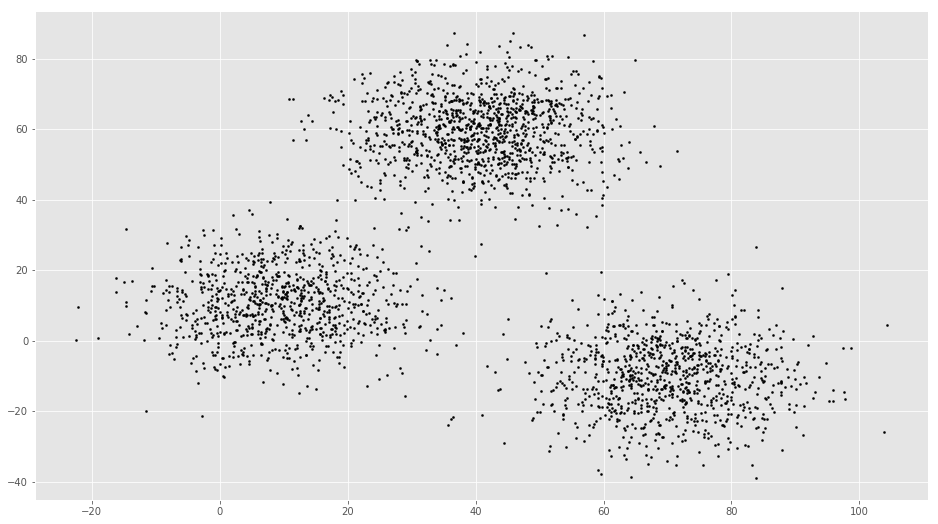

In [6]:
#store each column in a vector f
f1 = data['V1'].values
f2 = data['V2'].values
#store both vectors in array X
X = np.array(list(zip(f1, f2)))
#plot the data
plt.scatter(f1, f2, c='k', s=4)

# Define function for Euclidean distance

In [0]:
#euclidean distance
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [8]:
#initialize parameters for knn

#number of clusters
k = 3
#x-coordinates of random centroid position
C_x = np.random.randint(0, np.max(X)-20, size=k)
#y-coordinates of random centroid position
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
#print the random coordinates of the centroids
print(C)

[[14. 55.]
 [56. 78.]
 [30. 75.]]


# Plot the Data along with the initialized Centroids

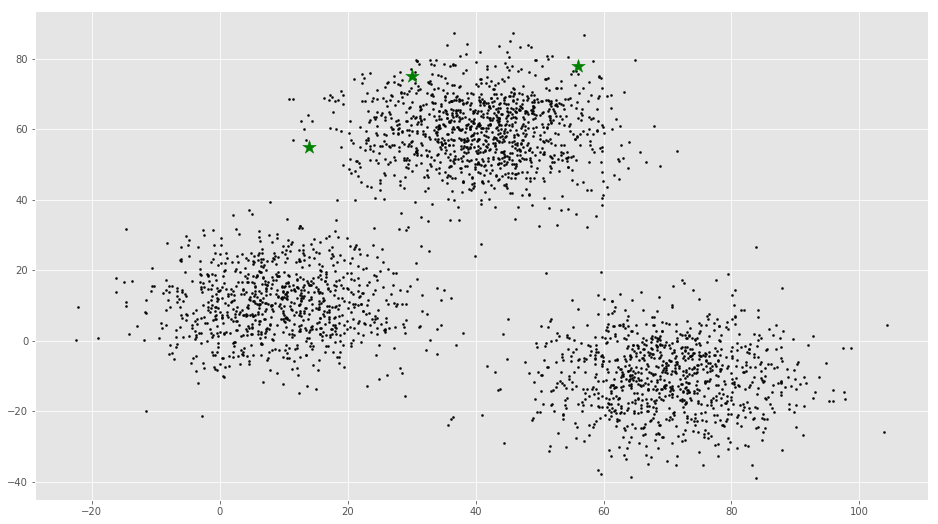

In [9]:
plt.scatter(f1, f2, c='#050505', s=4)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [0]:
#to store the old centroid values for updating
C_old = np.zeros(C.shape)
#cluster labels(0, 1, 2)
clusters = np.zeros(len(X))
#error function -the distance between new centroids and old centroids
error = dist(C, C_old, None)
#loop will run till the error becomes zero
while error != 0:
    #assigning each value to its closest cluster
    for i in range(len(X)):
        #find the closest cluster to each datapoint per loop
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
        
    #store the old centroid values
    C_old = deepcopy(C)
    #updating/finding the new centroids by taking the average value over each cluster
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    #calculate the error for each updated centroid
    error = dist(C, C_old, None)

# Plot the Clusters and updated Centroids

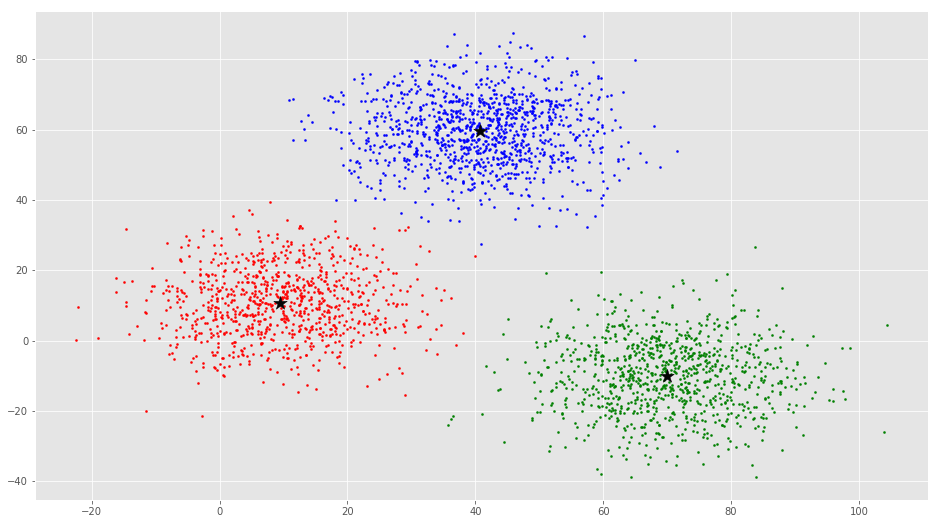

In [11]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=4, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')